# Linear Models for Regression

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from sklearn.linear_model import Ridge, LinearRegression

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
X, y = boston.data, boston.target

In [6]:
X.shape

(506, 13)

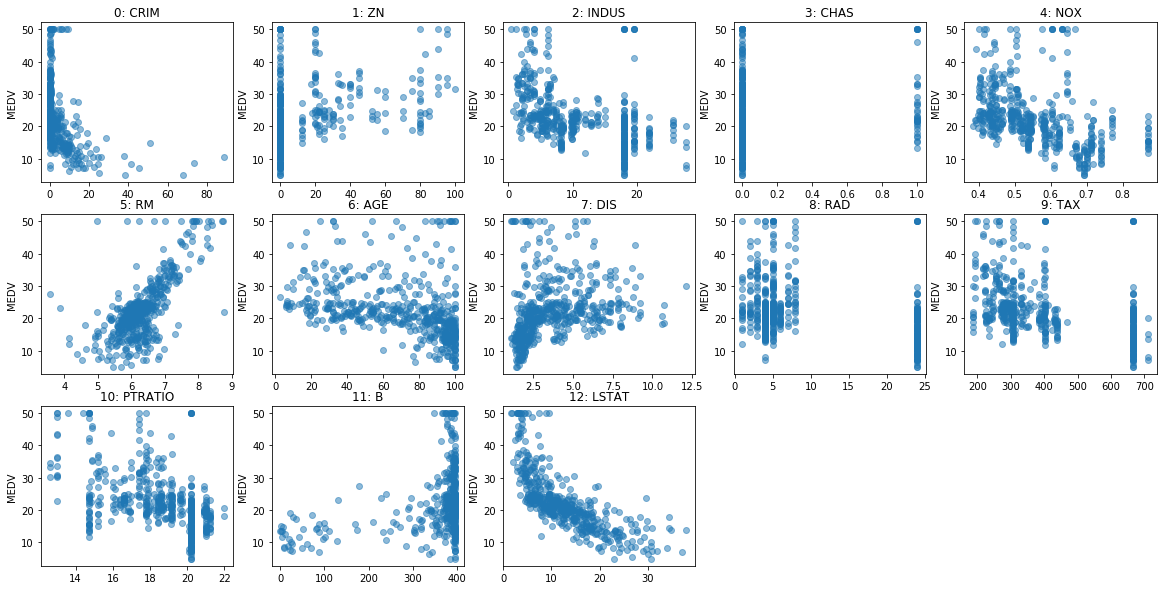

In [7]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [8]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.7160133196648378

In [11]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.7140510045941364

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 14)}
print(param_grid)

{'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])}


In [13]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-03, 2.89427e-03, 8.37678e-03, 2.42446e-02, 7.01704e-02,
       2.03092e-01, 5.87802e-01, 1.70125e+00, 4.92388e+00, 1.42510e+01,
       4.12463e+01, 1.19378e+02, 3.45511e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Text(0, 0.5, 'score')

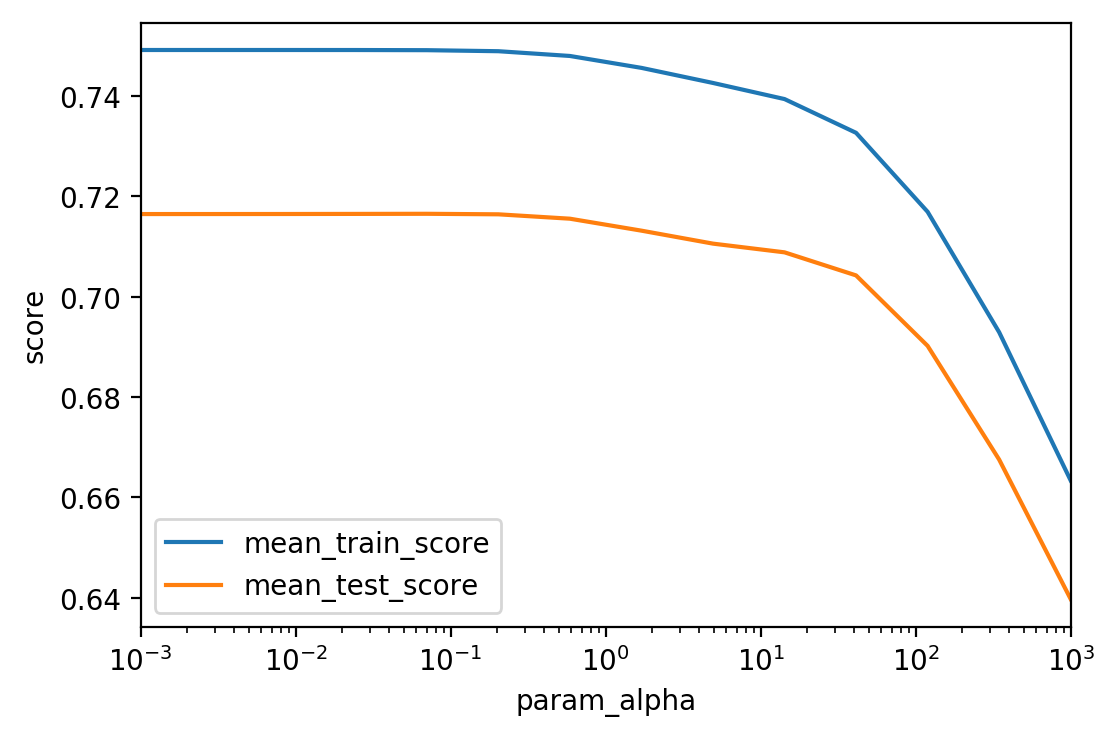

In [14]:
import pandas as pd
plt.figure(dpi=200)
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.xscale("log")
plt.xlabel("param_alpha")
plt.ylabel("score")

In [17]:
from sklearn.preprocessing import PolynomialFeatures, scale
# being lazy and not really doing things properly whoops
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print(X.shape,X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(506, 13) (506, 104)


In [18]:
np.mean(cross_val_score(LinearRegression(),X_train, y_train, cv=10))

0.8065638995073066

In [19]:
np.mean(cross_val_score(Ridge(),X_train, y_train, cv=10))

0.822709961341873

In [21]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-03, 2.89427e-03, 8.37678e-03, 2.42446e-02, 7.01704e-02,
       2.03092e-01, 5.87802e-01, 1.70125e+00, 4.92388e+00, 1.42510e+01,
       4.12463e+01, 1.19378e+02, 3.45511e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

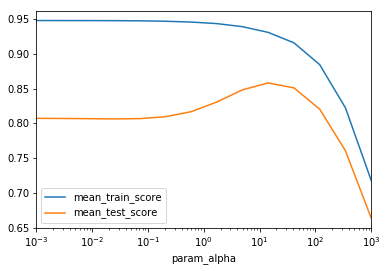

In [22]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.legend()
plt.xscale("log")

In [24]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 14.251026703029993}
0.8580259261370748


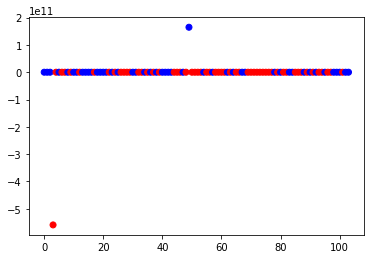

In [25]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")

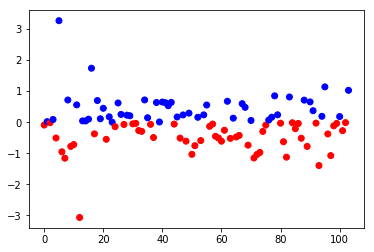

In [26]:
ridge = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")

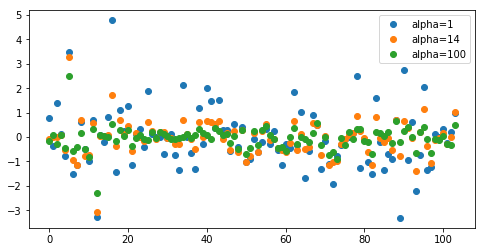

In [27]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge.coef_, 'o', label="alpha=14")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend()

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.78
Test set score: 0.72
Number of features used: 9


# Exercise
Load the diabetes dataset using ``sklearn.datasets.load_diabetes``. Apply ``LinearRegression``, ``Ridge`` and ``Lasso`` and visualize the coefficients. Try polynomial features.

Linear regression score: 0.49251881148113147
Ridge Regression score: 0.42152467745118216
Linear regression w/ scaling: 0.49251881148113147
Ridge regression w/ scaling: 0.49483454686272177


/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 10.0} 0.500144114905263


/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 1.0} 0.5037423682004091
Linear regression poly features: 0.37218131278721367
Ridge regression poly features: 0.4352832559502807


/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 100.0} 0.4742481709659994


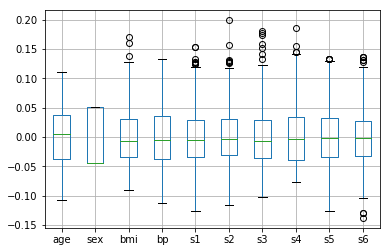

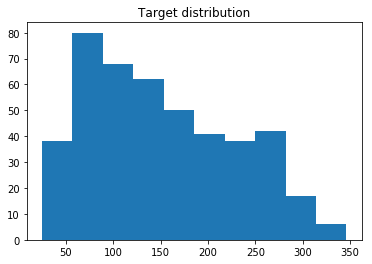

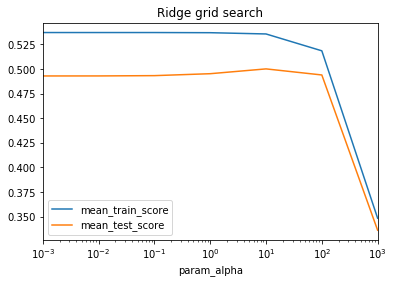

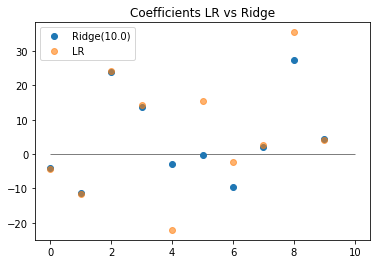

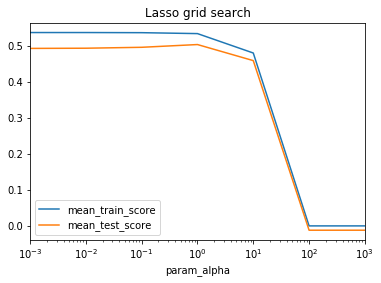

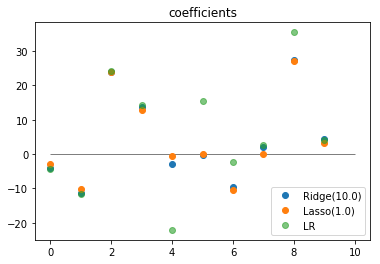

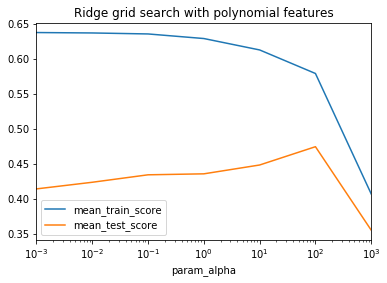

In [73]:
# %load solutions/linear_models_diabetes.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

# create dataframe for easy boxplot
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.boxplot()

plt.figure()
plt.title("Target distribution")
plt.hist(diabetes.target, bins="auto")

X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target)

scores_lr = cross_val_score(LinearRegression(), X_train, y_train, cv=10)
print("Linear regression score: {}".format(scores_lr.mean()))
scores_ridge = cross_val_score(Ridge(), X_train, y_train, cv=10)
print("Ridge Regression score: {}".format(scores_ridge.mean()))

# With scaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scores_lr = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=10)
print("Linear regression w/ scaling: {}".format(scores_lr.mean()))
scores_ridge = cross_val_score(Ridge(), X_train_scaled, y_train, cv=10)
print("Ridge regression w/ scaling: {}".format(scores_ridge.mean()))

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train_scaled, y_train)

res = pd.DataFrame(grid.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Ridge grid search")


print(grid.best_params_, grid.best_score_)

lr = LinearRegression().fit(X_train_scaled, y_train)

plt.figure()
plt.title("Coefficients LR vs Ridge")
plt.hlines(0, 0, X_train.shape[1], linewidth=.5)
plt.plot(grid.best_estimator_.coef_, 'o', label="Ridge({})".format(grid.best_params_['alpha']))
plt.plot(lr.coef_, 'o', label="LR", alpha=.6)
plt.legend()

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid_lasso = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid_lasso.fit(X_train_scaled, y_train)

res = pd.DataFrame(grid_lasso.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Lasso grid search")
print(grid_lasso.best_params_, grid_lasso.best_score_)

plt.figure()
plt.title("coefficients")
plt.hlines(0, 0, X_train.shape[1], linewidth=.5)
plt.plot(grid.best_estimator_.coef_, 'o', label="Ridge({})".format(grid.best_params_['alpha']))
plt.plot(grid_lasso.best_estimator_.coef_, 'o', label="Lasso({})".format(grid_lasso.best_params_['alpha']))
plt.plot(lr.coef_, 'o', label="LR", alpha=.6)
plt.legend()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

scores_lr = cross_val_score(LinearRegression(), X_train_poly, y_train, cv=10)
print("Linear regression poly features: {}".format(scores_lr.mean()))
scores_ridge = cross_val_score(Ridge(), X_train_poly, y_train, cv=10)
print("Ridge regression poly features: {}".format(scores_ridge.mean()))

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train_poly, y_train)

res = pd.DataFrame(grid.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Ridge grid search with polynomial features")


print(grid.best_params_, grid.best_score_)
# score with polynomial features is worse!

In [29]:
from sklearn.datasets import load_diabetes

In [66]:
X,y=load_diabetes(return_X_y=True)
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print(X.shape,X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, random_state=42)

(442, 10) (442, 65)


In [67]:
result_linearr=cross_val_score(LinearRegression(),X_train, y_train, cv=10)
result_ridger=cross_val_score(Ridge(),X_train, y_train, cv=10)
result_lassor=cross_val_score(Lasso(),X_train, y_train, cv=10)

In [68]:
print('Mean accuracy Linear Regression: {}'.format(round(np.mean(result_linearr),2)))
print('Mean accuracy Ridge Regression: {}'.format(round(np.mean(result_ridger),2)))
print('Mean accuracy Lasso Regression: {}'.format(round(np.mean(result_lassor),2)))

Mean accuracy Linear Regression: 0.28
Mean accuracy Ridge Regression: 0.32
Mean accuracy Lasso Regression: 0.38


([<matplotlib.axis.XTick at 0x1a204c5400>,
 <a list of 3 Text xticklabel objects>)

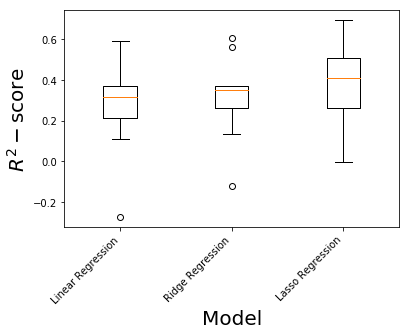

In [69]:
data=[result_linearr,result_ridger,result_lassor]

plt.boxplot(data)
plt.xlabel('Model',fontsize=20)
plt.ylabel(r'$R^2-$score',fontsize=20)
plt.xticks([1,2,3],
           labels=['Linear Regression',
                   'Ridge Regression',
                   'Lasso Regression'],
           rotation=45,ha='right')

In [70]:
linear = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)

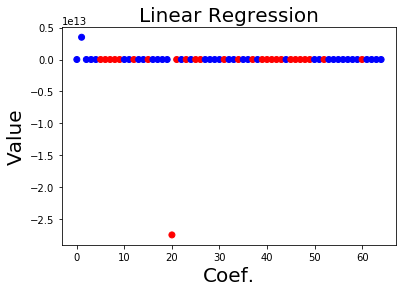

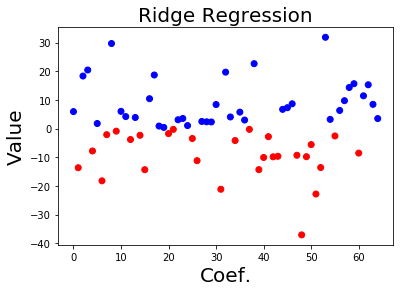

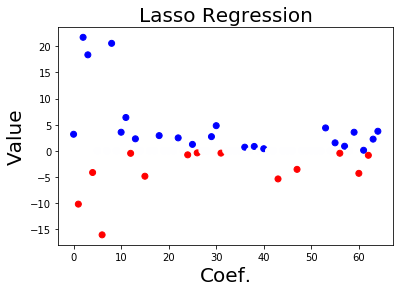

In [71]:
plt.scatter(range(X_train.shape[1]), linear.coef_, c=np.sign(linear.coef_), cmap="bwr_r")
plt.xlabel('Coef.',fontsize=20)
plt.ylabel(r'Value',fontsize=20)
plt.title('Linear Regression', fontsize=20)
plt.show()

plt.scatter(range(X_train.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")
plt.xlabel('Coef.',fontsize=20)
plt.ylabel(r'Value',fontsize=20)
plt.title('Ridge Regression', fontsize=20)
plt.show()

plt.scatter(range(X_train.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r")
plt.xlabel('Coef.',fontsize=20)
plt.ylabel(r'Value',fontsize=20)
plt.title('Lasso Regression', fontsize=20)
plt.show()